# Phenomenological Models for the Global 21-cm Signal

Two common phenomenological parameterizations for the global 21-cm signal are included in *ARES* and get their own set of pre-defined parameters: the tanh and Gaussian models. To generate them (without default parameters) one need only do:

Populating the interactive namespace from numpy and matplotlib
# Loaded $ARES/input/inits/inits_planck_TTTEEE_lowl_lowE_best.txt.
# Loaded $ARES/input/inits/inits_planck_TTTEEE_lowl_lowE_best.txt.

##############################################################################################################
####                                      ARES Simulation: Overview                                       ####
##############################################################################################################
Phenomenological model! Not much to report...
##############################################################################################################
# Loaded $ARES/input/inits/inits_planck_TTTEEE_lowl_lowE_best.txt.

##############################################################################################################
####                                      ARES Simulation: Overview                                       ####
######################

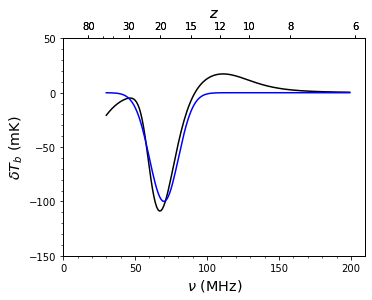

In [1]:
%pylab inline
import ares
import numpy as np
import matplotlib.pyplot as pl
    
sim_1 = ares.simulations.Global21cm(tanh_model=True)
sim_2 = ares.simulations.Global21cm(gaussian_model=True)
    
# Have a look
ax, zax = sim_1.GlobalSignature(color='k', fig=1)
ax, zax = sim_2.GlobalSignature(color='b', ax=ax)

Now, you might say "I could have done that myself extremely easily." You'd be right! However, sometimes there's an advantage in working through *ARES* even when using simply parametric forms for the global 21-cm signal. For example, you can tap into *ARES*' inference module and fit data, perform forecasting, or run large sets of models. In each of these applications, *ARES* can take care of some annoying things for you, like tracking the quantities you care about and saving them to disk in a format that can be easily analyzed later on. For more concrete examples, check out the following pages:

* [Example: Inline Analysis](example_inline_analysis)
* [Example: MCMC Global Signal](example_mcmc_gs)
* [Example: MC Sampling](example_mc_sampling)
* [Example: MCMC Analysis](example_mcmc_analysis)

In the remaining sections we'll cover different ways to parameterize the signal.

### Parameterizing the IGM 

Whereas the Gaussian absorption model makes no link between the brightness temperature and the underlying quantities of interest (ionization history, etc.), the tanh model first models $J_{\alpha}(z)$, $T_K(z)$, and $x_i(z)$, and from those histories produces $\delta T_b(z)$.

Now, let's assemble a set of parameters that will generate a global 21-cm signal using ParameterizedQuantity objects for each main piece: the thermal, ionization, and Ly-$\alpha$ histories. We'll assume that the thermal and ionization histories are *tanh* functions, but take the Ly-$\alpha$ background evolution to be a power-law in redshift:


In [2]:
pars = \
    {
        'problem_type': 100,           # blank slate global 21-cm signal problem
        'parametric_model': True,      # in lieu of, e.g., tanh_model=True
        
        # Lyman alpha history first: ParameterizedQuantity #0
        'pop_Ja': 'pq[0]',
        'pq_func[0]': 'pl',         # Ja(z) = p0 * ((1 + z) / p1)**p2
        'pq_func_var[0]': '1+z',
        'pq_func_par0[0]': 1e-9,
        'pq_func_par1[0]': 20.,
        'pq_func_par2[0]': -7.,
        
        # Thermal history: ParameterizedQuantity #1
        'pop_Tk': 'pq[1]',         # Tk(z) = p1 + (p0 - p1) * 0.5 * (1 + tanh((p2 - z) / p3))
        'pq_func[1]': 'tanh_abs',
        'pq_func_var[1]': 'z',
        'pq_func_par0[1]': 1e3,
        'pq_func_par1[1]': 0.,
        'pq_func_par2[1]': 8.,
        'pq_func_par3[1]': 6.,
        
        # Ionization history: ParameterizedQuantity #2
        'pop_xi': 'pq[2]',        # xi(z) = p1 + (p0 - p1) * 0.5 * (1 + tanh((p2 - z) / p3))
        'pq_func[2]': 'tanh_abs',
        'pq_func_var[2]': 'z',
        'pq_func_par0[2]': 1,
        'pq_func_par1[2]': 0.,
        'pq_func_par2[2]': 8.,
        'pq_func_par3[2]': 2.,
    }

**NOTE:** The thermal history automatically includes the adiabatic cooling term, so users need not add account for that explicitly.

To run it, as always:

In [3]:
sim_3 = ares.simulations.Global21cm(**pars)
sim_3.GlobalSignature(color='r', ax=ax)

# Loaded $ARES/input/inits/inits_planck_TTTEEE_lowl_lowE_best.txt.
# Loaded $ARES/input/inits/inits_planck_TTTEEE_lowl_lowE_best.txt.

##############################################################################################################
####                                      ARES Simulation: Overview                                       ####
##############################################################################################################
Phenomenological model! Not much to report...
##############################################################################################################


(<AxesSubplot:xlabel='$\\nu \\ (\\mathrm{MHz})$', ylabel='$\\delta T_b \\ (\\mathrm{mK})$'>,
 <AxesSubplot:label='9157b3c5-0ac4-4ab0-a189-082ba54264a3', xlabel='$z$'>)

<Figure size 432x288 with 0 Axes>

Now, because the parameters of these models are hard to intuit ahead of time, it can be useful to run a set of them. As per usual, we can use some built-in machinery.

In [4]:
blob_pars = ares.util.BlobBundle('gs:basics') \
          + ares.util.BlobBundle('gs:history')

base_pars = pars.copy()
base_pars.update(blob_pars)
    
mg = ares.inference.ModelGrid(**base_pars)

Let's focus on the $J_{\alpha}(z)$ parameters:

In [5]:
mg.axes = {'pq_func_par1[0]': np.arange(15, 26, 1), 
           'pq_func_par2[0]': np.arange(-9, -2.5, 0.5)}
    
mg.run('test_Ja_pl', clobber=True)

grid: N/A% |                                                                                  | ETA:  --:--:-- 

Starting 143-element model grid.
Running 143-element model grid.


grid: 100% |##################################################################################| Time:  0:00:14 


Processor 0: Wrote test_Ja_pl.*.pkl (Mon Sep 27 18:25:24 2021)
Calculation complete: Mon Sep 27 18:25:24 2021
Elapsed time (min)  : 0.25


and a quick plot:


##############################################################################################################
####                                         Analysis: Model Set                                          ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Basic Information                                                                                    ####
#### ---------------------------------------------------------------------------------------------------- ####
#### path        : ./                                                                                     ####
#### prefix      : test_Ja_pl                                                                             ####
#### N-d         : 2                                                                                      ####


<AxesSubplot:xlabel='par 0', ylabel='par 1'>

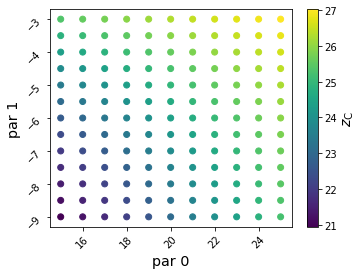

In [6]:
anl = ares.analysis.ModelSet('test_Ja_pl')
    
anl.Scatter(anl.parameters, c='z_C', fig=4, edgecolors='none')